### Step-by-step implementation

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('iris_2D.csv')
data

,Petal_Length,Petal_Width,Label
0,1.4,0.2,0.0
1,1.3,0.4,0.0
2,1.4,0.3,0.0
3,4.0,1.0,1.0
4,4.7,1.4,1.0
5,3.6,1.3,1.0


In [ ]:
# 1. data
X = data[['Petal_Length', 'Petal_Width']].to_numpy()
print(X)

[[1.4 0.2]
 [1.3 0.4]
 [1.4 0.3]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]]


In [3]:
k = 2
max_iters = 2

# initialize centroids
centroids = X[:k]
print('Init centroids: ', centroids)
print(centroids.shape)

for _ in range(max_iters):
    # assign points
    #distances = np.linalg.norm(X[:, np.newaxis, :] - centroids, axis=2)
    distances = np.sqrt( ((X[:, np.newaxis, :] - centroids)**2).sum(axis=2) )
    labels = np.argmin(distances, axis=1)
    print('distances: ', distances)

    # update centroids
    print('X:', X.shape)
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # check for convergence
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids

    # print
    print("Labels:", labels)
    print("Centroids:", centroids)

# calculate WCSS
wcss = np.sum([np.sum(np.square(X[labels == i] - centroids[i])) for i in range(k)])
print("WCSS:", wcss)

Init centroids:  [[1.4 0.2]
 [1.3 0.4]]
(2, 2)
distances:  [[0.         0.2236068 ]
 [0.2236068  0.        ]
 [0.1        0.14142136]
 [2.7202941  2.76586334]
 [3.51140997 3.54400903]
 [2.45967478 2.46981781]]
X: (6, 2)
Labels: [0 1 0 0 0 0]
Centroids: [[3.02 0.84]
 [1.3  0.4 ]]
distances:  [[1.74183811 0.2236068 ]
 [1.77538728 0.        ]
 [1.70762994 0.14142136]
 [0.99297533 2.76586334]
 [1.77087549 3.54400903]
 [0.74027022 2.46981781]]
X: (6, 2)
Labels: [1 1 1 0 0 0]
Centroids: [[4.1        1.23333333]
 [1.36666667 0.3       ]]
WCSS: 0.7333333333333334


### Using sklearn

In [4]:
import numpy as np
import pandas as pd

data = pd.read_csv('iris_2D.csv')
X = data[['Petal_Length', 'Petal_Width']].to_numpy()

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X.reshape(-1, 2))
labels = kmeans.labels_

print(labels)
print(kmeans.inertia_)

for x, label in zip(X, labels):
    print(f"Cluster {label}: {x}")

[0 0 0 1 1 1]
0.7333333333333335
Cluster 0: [1.4 0.2]
Cluster 0: [1.3 0.4]
Cluster 0: [1.4 0.3]
Cluster 1: [4. 1.]
Cluster 1: [4.7 1.4]
Cluster 1: [3.6 1.3]


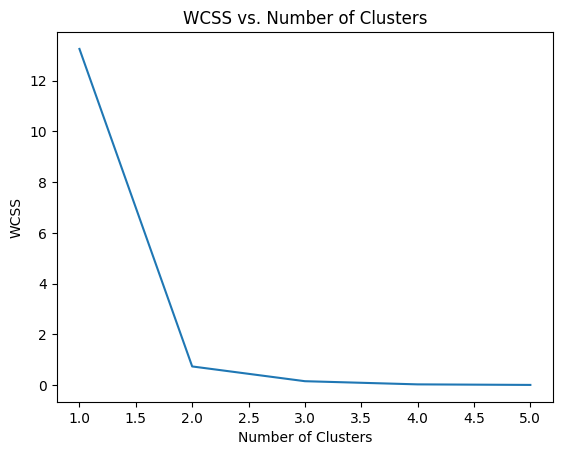

In [6]:
import matplotlib.pyplot as plt

wcss_values = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X.reshape(-1, 2))
    wcss = kmeans.inertia_
    wcss_values.append(wcss)

plt.plot(range(1, 6), wcss_values)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('WCSS vs. Number of Clusters')
plt.show()